# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [3]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [1]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")

NameError: name 'pd' is not defined

### EDA

In [15]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [16]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [17]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [19]:
#(include="all") is for inclusion of even categorical variables.
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


In [20]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


### Converting Instant_bookable from 'f' and 't' to boolean

In [21]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [22]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [23]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.0,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,NaN,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.0,0.0,1.0,4.744932,0,0,1,0,1


In [24]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
instant_bookable                    0
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
dtype: int64

### Imputing missing values

In [26]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
instant_bookable                0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
dtype: int64

In [27]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.0,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,96.0,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.0,0.0,1.0,4.744932,0,0,1,0,1


### Checking for duplicates

In [28]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 21145


Drop off the duplicates:

In [29]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (52966, 12)


In [30]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

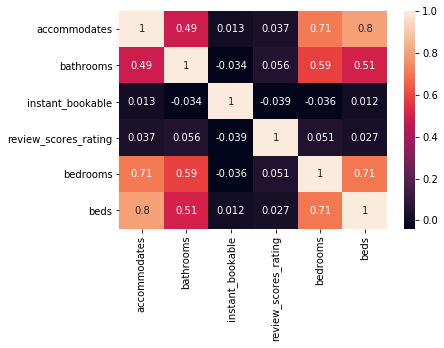

In [33]:
sns.heatmap(df.iloc[:, 0:6].corr()
            ,annot=True
           )
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52966 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  52966 non-null  float64
 1   bathrooms                     52966 non-null  float64
 2   instant_bookable              52966 non-null  bool   
 3   review_scores_rating          52966 non-null  float64
 4   bedrooms                      52966 non-null  float64
 5   beds                          52966 non-null  float64
 6   log_price                     52966 non-null  float64
 7   room_type_Private room        52966 non-null  uint8  
 8   room_type_Shared room         52966 non-null  uint8  
 9   cancellation_policy_moderate  52966 non-null  uint8  
 10  cancellation_policy_strict    52966 non-null  uint8  
 11  cleaning_fee_True             52966 non-null  uint8  
dtypes: bool(1), float64(6), uint8(5)
memory usage: 3.1 MB


### Train-Test Split

In [ ]:
#'X' variables always be "independent variable" and 'y' be "dependent variable"

In [36]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [37]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,0,0,0,1,1
1,7.0,1.0,True,93.0,3.0,3.0,0,0,0,1,1
2,5.0,1.0,True,92.0,1.0,3.0,0,0,1,0,1
3,4.0,1.0,False,96.0,2.0,2.0,0,0,0,0,1
4,2.0,1.0,True,40.0,0.0,1.0,0,0,1,0,1


In [40]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [41]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.07523511830395725
The coefficient for bathrooms is 0.14410572041298414
The coefficient for instant_bookable is -0.0628161021282757
The coefficient for review_scores_rating is 0.007491669021656794
The coefficient for bedrooms is 0.15609461102478142
The coefficient for beds is -0.04847314534915298
The coefficient for room_type_Private room is -0.6347067783323117
The coefficient for room_type_Shared room is -1.1042469799861876
The coefficient for cancellation_policy_moderate is -0.06111696082549094
The coefficient for cancellation_policy_strict is -0.01068727023651993
The coefficient for cleaning_fee_True is -0.07753152863129589


In [45]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.94554840176694


In [46]:
#score - adjusted R^2
# R square on training data
regression_model.score(X_train, y_train)

0.5044409039323565

50% of the variation in the log_price is explained by the predictors in the model for train set

In [47]:
# R square on testing data
regression_model.score(X_test, y_test)

0.505240413213738

In [48]:
#Root Mean Square Error(RMSE)
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.5338326566099842

In [73]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5345547406435409

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.94) * Intercept + (-0.06) * instant_bookable[T.True] + (0.07) * accommodates + (0.14) * bathrooms + (0.007) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.63) * room_type_private_room + (-1.10) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant 
,When no. of bathrooms increases by 1 unit, log_price increases by 0.14 units, keeping all other predictors constant
,etcc....

  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.10. This implies, when the room type is shared room, the log_price decreases by 1.10 units, keeping all other predictors constant. etc..



#  Insights

1) There is a Decrement in Price of the property by a larger factor if the rooms are Shared rather than Private .

2) There is a Decrement in Price of the property by a larger factor if the property has a Strict Cancellation Policy 
   rather than a Moderate Cancellation Policy.
   
3) More the number of bedrooms/bathrooms the price of the property goes up a little 

4) while More the number of beds the price of the property goes down a little . 


In [4]:
df = pd.read_csv("AirBNB-1.csv")

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_9420\1299081656.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB-1.csv")
